# Laboratorio 6 <br> Análisis de redes sociales
Jeyner Arango 201106 <br>
Oscar Mendez 20302

In [351]:
import matplotlib.pyplot as plt
import pandas as pd
import advertools as adv
import seaborn as sns
import re, time, emojis, nltk
from IPython.display import Image, display, Markdown
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import namedtuple, Counter
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sentiment_analysis_spanish import sentiment_analysis
pd.set_option('display.max_colwidth', 140)

In [249]:
nltk.download('stopwords')
nltk.download('wordnet')
spanish_stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [210]:
### API X.com
consumer_key = 'PhlbP0ijLI4UcUOoJ3V4h5YLA'
consumer_secret = 'ely9TEKgzo2JsRPGNNrcBe9vmLcXwZZK94AK6vayk7cm0n6AXK'
access_token = '186808723-ck2WhAajeKTvClkpXazsR5FqTzNUxrgROMDP9SHx'
access_token_secret = 'QLZGpTNjGt2bqS7jmvmwS9BWsLpwhic485Yqai3DmIdIH'

In [399]:
def get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

In [400]:
def clean_tweets(tweet):
    """ 
    removemos handles @user, links https, numeros,
    pasamos a minuscula, removemos numeros, partimos texto,
    eliminamos espacios innecesarios y volvemos a unir texto 

    @return texto limpio
    """
    url_regex = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
    #all_emoji_regex = re.compile(multi_codepoint_emoji_joined + '|' +  r'[' + single_codepoint_emoji_raw + r']')
    del_amp = BeautifulSoup(tweet, 'lxml')
    del_amp_text = del_amp.get_text()
    user_removed = re.sub(r'@[A-Za-z0-9]+','',del_amp_text)
    link_removed = re.sub(url_regex,'',user_removed)
    number_removed = re.sub(r'\d+', '', link_removed)
    hashtag_removed = re.sub('#','', number_removed)
    #emoticons_removed = re.sub(all_emoji_regex, '',hashtag_removed)
    lower_case = hashtag_removed.lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case)
    token_tweet = (' '.join(words)).strip()
    clean_tweet = ' '.join([word for word in token_tweet.split() if word not in spanish_stop_words])
    return token_tweet

In [401]:
def lemmatize_tweet(tweet):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tweet.split()]
    lemmatized_tweet = ' '.join(lemmatized_words)
    return lemmatized_tweet

## Problema 1

Primero leemos el dataset y nos quedamos uniccamente con las columnas que nos interesan para este problema.

In [383]:
df_trafico = pd.read_csv('traficogt.csv', index_col=0, parse_dates=['date'])
df_trafico = df_trafico[['id', 'date', 'rawContent', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount']]
df_trafico.head()

id                      date  \
0  1701654244858679742 2023-09-12 17:49:21+00:00   
1  1701651855212691764 2023-09-12 17:39:52+00:00   
2  1701348453916311903 2023-09-11 21:34:15+00:00   
3  1701995859229958189 2023-09-13 16:26:49+00:00   
4  1701216420997017888 2023-09-11 12:49:36+00:00   

                                                                                                                                    rawContent  \
0  #AHORA Amílcar Montejo, director de Comunicación de Emetra, informó que, tras colisión en la calzada Roosevelt y 16 avenida de la zona 1...   
1  CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES MULTADA \n\n📍Calzada Roosevelt 16 avenida zona 11\n\nTras colisión, se negó a quitar vehí...   
2  Camión de arena volteado en el viaducto el pulté hacia hacienda real. Boulevares Acatan y la Montaña colapsados #transitogt #traficogt @...   
3  Paciente de 39 años, dolor lumbar de 1 año tras caída.\n\nHizo 45 sesiones de fisio SIN mejoría. Sugirieron cirugía.\n\nAcudió por 2da o...   
4  #AHORA Amílcar Montejo, director de Comunicación de Emetra, informa que un vehículo quedó atravesado en la vía pública, bloqueando un ca...   

   replyCount  retweetCount  likeCount  quoteCount  
0           1             2          8           0  
1         149            78        524          49  
2           2             1          4           0  
3           3            17         95           0  
4           0             0         20           0

### Limpieza de Datos

In [384]:
df_trafico['year'] = df_trafico['date'].dt.year
df_trafico['month'] = df_trafico['date'].dt.month
df_trafico['day'] = df_trafico['date'].dt.day
df_trafico['hour'] = df_trafico['date'].dt.hour
df_trafico['date'] = pd.to_datetime(df_trafico['date'].dt.date)

In [385]:
df_trafico = df_trafico[df_trafico.year == 2023]

In [388]:
df_trafico['clean_text'] = df_trafico['rawContent'].apply(clean_tweets)
df_trafico['clean_text'] = df_trafico['clean_text'].apply(lemmatize_tweet)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_26572\3993016833.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  del_amp = BeautifulSoup(tweet, 'lxml')
C:\Users\Administrador\AppData\Local\Temp\ipykernel_26572\3993016833.py:11: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  del_amp = BeautifulSoup(tweet, 'lxml')


In [389]:
df_trafico['sentiment'] = df_trafico['clean_text'].apply(get_sentiment)
df_trafico.head()

id       date  \
0  1701654244858679742 2023-09-12   
1  1701651855212691764 2023-09-12   
2  1701348453916311903 2023-09-11   
3  1701995859229958189 2023-09-13   
4  1701216420997017888 2023-09-11   

                                                                                                                                    rawContent  \
0  #AHORA Amílcar Montejo, director de Comunicación de Emetra, informó que, tras colisión en la calzada Roosevelt y 16 avenida de la zona 1...   
1  CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES MULTADA \n\n📍Calzada Roosevelt 16 avenida zona 11\n\nTras colisión, se negó a quitar vehí...   
2  Camión de arena volteado en el viaducto el pulté hacia hacienda real. Boulevares Acatan y la Montaña colapsados #transitogt #traficogt @...   
3  Paciente de 39 años, dolor lumbar de 1 año tras caída.\n\nHizo 45 sesiones de fisio SIN mejoría. Sugirieron cirugía.\n\nAcudió por 2da o...   
4  #AHORA Amílcar Montejo, director de Comunicación de Emetra, informa que un vehículo quedó atravesado en la vía pública, bloqueando un ca...   

   replyCount  retweetCount  likeCount  quoteCount  year  month  day  hour  \
0           1             2          8           0  2023      9   12    17   
1         149            78        524          49  2023      9   12    17   
2           2             1          4           0  2023      9   11    21   
3           3            17         95           0  2023      9   13    16   
4           0             0         20           0  2023      9   11    12   

                                                                                                                                    clean_text  \
0  ahora amílcar montejo , director de comunicación de emetra , informó que , tras colisión en la calzada roosevelt y avenida de la zona , ...   
1  conductora que se negó a movilizar vehículo e multada calzada roosevelt avenida zona tras colisión , se negó a quitar vehículo de la dob...   
2        camión de arena volteado en el viaducto el pulté hacia hacienda real . boulevares acatan y la montaña colapsados transitogt traficogt   
3  paciente de años , dolor lumbar de año tras caída . hizo sesiones de fisio sin mejoría . sugirieron cirugía . acudió por da opinión e in...   
4  ahora amílcar montejo , director de comunicación de emetra , informa que un vehículo quedó atravesado en la vía pública , bloqueando un ...   

   sentiment  
0     0.0000  
1     0.0000  
2     0.0000  
3    -0.5574  
4     0.0000

### Analisis Exploratorio

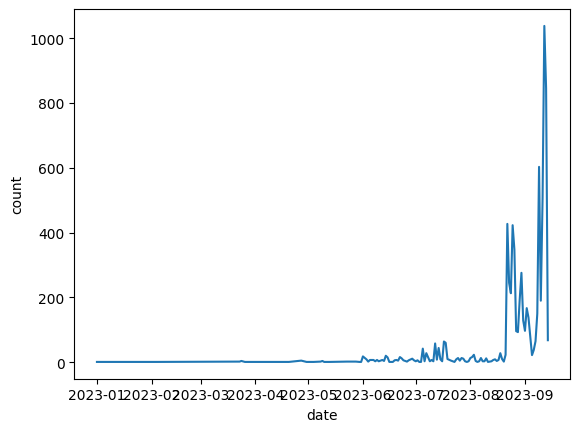

In [390]:
date_counts = df_trafico['date'].value_counts().reset_index()
date_counts.columns = ['date', 'count']
sns.lineplot(data=date_counts, x='date', y='count')
plt.show()

### Trafico en epoca de lluvia

Tomamos como epoca de lluvia desde mayo hasta el presente, y de enero a abril como no lluvia.

In [392]:
df_trafico['lluvia'] = df_trafico.month >= 5

En el grafico de abajo vemos como ha cambiado en sentimiento promedio respecto al trafico. En este caso decidimos verlo por mes para ver mas clara la diferencia. Vemos como baja significatimente cuando empieza la epoca de lluvia.

<AxesSubplot: xlabel='month', ylabel='sentiment'>

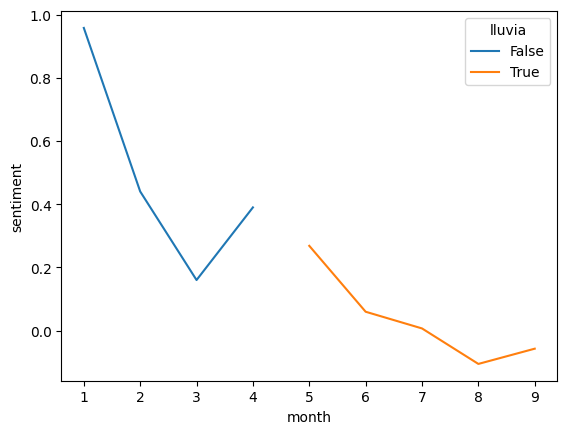

In [393]:
sns.lineplot(x='month', y='sentiment', hue='lluvia', errorbar=None, data=df_trafico)

### Socavón de zona 5

In [394]:
df_trafico['socavon'] = df_trafico.date >= '2023-08-13'

Una vez mas vemos que a partir de determinada fecha, en este caso el 13 de agosto, en promedio si ha bajado el sentimiento.

<AxesSubplot: xlabel='month', ylabel='sentiment'>

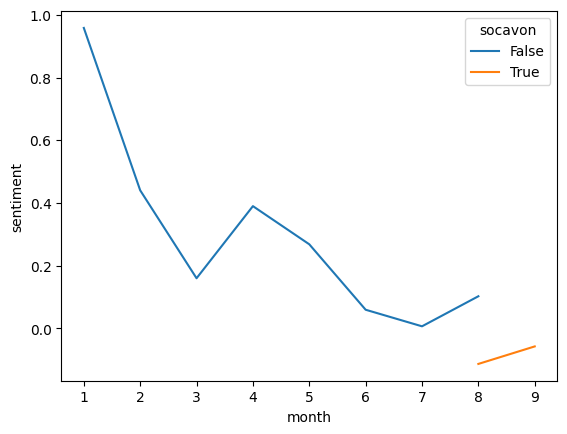

In [395]:
sns.lineplot(x='month', y='sentiment', hue='socavon', errorbar=None, data=df_trafico)

Extraemos los que hablen de la universidad, no hay forma de saber que se refieren exactamete a la del valle en algunos casos, pero como la localizacion en su mayoria son nulos, esta es la mejor alternativa.

In [396]:
df_trafico['u'] = df_trafico.clean_text.str.contains('|'.join(['vista hermosa', 'uvg', 'del valle', 'zona 15', 'zona 16', 'cayala', ' u ', 'vh']), case=False)

Vemos que desde que empiezan a aparecer estas palabras en la muestra, no vemos una diferencia clara en el sentimiento vs aquellos tweets que no estan relacionados a la universidad. Por lo que son igual de negativos que el resto.

<AxesSubplot: xlabel='date', ylabel='sentiment'>

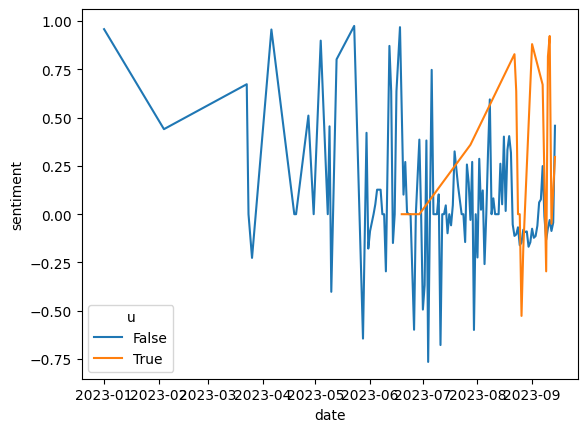

In [397]:
sns.lineplot(x='date', y='sentiment', hue='u', errorbar=None, data=df_trafico)

Si lo vemos por cantidad de veces que aparecen estas palabras, vemos claramente en agosto empiezan a aumnetar significativamente, por lo que si ha afctado la tendencia en las ultimas semanas.

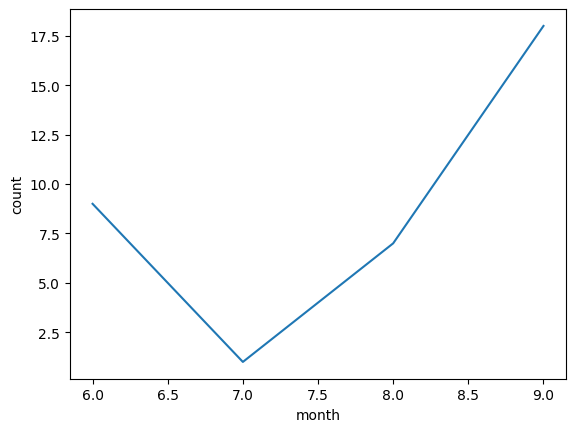

In [398]:
df_trafico_u = df_trafico[df_trafico.u]
date_counts = df_trafico_u['month'].value_counts().reset_index()
date_counts.columns = ['month', 'count']
sns.lineplot(data=date_counts, x='month', y='count')
plt.show()

## Problema 2 
### Análisis Exploratorio
#### Creacion de REGEX para emoticons

In [52]:
with open('emoji-test.txt', 'rt', encoding='UTF-8') as file:
    emoji_raw = file.read()

In [53]:
EmojiEntry = namedtuple('EmojiEntry', ['codepoint', 'status', 'emoji', 'name', 'group', 'sub_group'])

In [54]:
E_regex = re.compile(r' ?E\d+\.\d+ ') # remove the pattern E<digit(s)>.<digit(s)>
emoji_entries = []

for line in emoji_raw.splitlines()[32:]:  # skip the explanation lines
    if line == '# Status Counts':  # the last line in the document
        break
    if 'subtotal:' in line:  # these are lines showing statistics about each group, not needed
        continue
    if not line:  # if it's a blank line
        continue
    if line.startswith('#'):  # these lines contain group and/or sub-group names
        if '# group:' in line:
            group = line.split(':')[-1].strip()
        if '# subgroup:' in line:
            subgroup = line.split(':')[-1].strip()
    if group == 'Component':  # skin tones, and hair types, skip, as mentioned above
        continue
    if re.search('^[0-9A-F]{3,}', line):  # if the line starts with a hexadecimal number (an emoji code point)
        # here we define all the elements that will go into emoji entries
        codepoint = line.split(';')[0].strip()  # in some cases it is one and in others multiple code points
        status = line.split(';')[-1].split()[0].strip() # status: fully-qualified, minimally-qualified, unqualified
        if line[-1] == '#':
            # The special case where the emoji is actually the hash sign "#". In this case manually assign the emoji
            if 'fully-qualified' in line:
                emoji = '#️⃣'
            else:
                emoji = '#⃣'  # they look the same, but are actually different 
        else:  # the default case
            emoji = line.split('#')[-1].split()[0].strip()  # the emoji character itself
        if line[-1] == '#':  # (the special case)
            name = '#'
        else:  # extract the emoji name
            split_hash = line.split('#')[1]
            rm_capital_E = E_regex.split(split_hash)[1]
            name = rm_capital_E
        templine = EmojiEntry(codepoint=codepoint,
                              status=status,
                              emoji=emoji,
                              name=name,
                              group=group,
                              sub_group=subgroup)
        emoji_entries.append(templine)

In [55]:
emoji_dict = {x.emoji: x for x in emoji_entries}

In [57]:
Counter([x.group for x in emoji_entries])

Counter({'People & Body': 2998,
         'Objects': 310,
         'Symbols': 304,
         'Flags': 275,
         'Travel & Places': 267,
         'Smileys & Emotion': 180,
         'Animals & Nature': 159,
         'Food & Drink': 135,
         'Activities': 96})

In [58]:
sorted(Counter([x.sub_group for x in emoji_entries]).items(), key=lambda x: x[1], reverse=True)[:30]

[('person-role', 635),
 ('family', 534),
 ('person-sport', 395),
 ('person-activity', 318),
 ('person-gesture', 300),
 ('country-flag', 258),
 ('person-fantasy', 245),
 ('person', 192),
 ('animal-mammal', 68),
 ('hand-fingers-open', 67),
 ('sky & weather', 65),
 ('hands', 62),
 ('hand-fingers-partial', 55),
 ('transport-ground', 55),
 ('clothing', 50),
 ('body-parts', 49),
 ('alphanum', 49),
 ('hand-single-finger', 43),
 ('person-resting', 42),
 ('geometric', 38),
 ('hand-fingers-closed', 36),
 ('tool', 35),
 ('arrow', 35),
 ('food-prepared', 34),
 ('time', 34),
 ('av-symbol', 34),
 ('other-symbol', 33),
 ('place-building', 32),
 ('office', 31),
 ('game', 30)]

In [59]:
multi_codepoint_emoji = []

for code in [c.codepoint.split() for c in emoji_entries]:
    if len(code) > 1:
        # turn to a hexadecimal number zfilled to 8 zeros e.g: '\U0001F44D'
        hexified_codes = [r'\U' + x.zfill(8) for x in code]  
        hexified_codes = ''.join(hexified_codes)  # join all hexadecimal components 
        multi_codepoint_emoji.append(hexified_codes)

# sorting by length in decreasing order is extremely important as demonstrated above
multi_codepoint_emoji_sorted = sorted(multi_codepoint_emoji, key=len, reverse=True)

# join with a "|" to function as an "or" in the regex
multi_codepoint_emoji_joined = '|'.join(multi_codepoint_emoji_sorted)

In [60]:
single_codepoint_emoji = []

for code in [c.codepoint.split() for c in emoji_entries]:
    if len(code) == 1:
        single_codepoint_emoji.append(code[0])

In [61]:
def get_ranges(nums):
    """Reduce a list of integers to tuples of local maximums and minimums.

    :param nums: List of integers.
    :return ranges: List of tuples showing local minimums and maximums
    """
    nums = sorted(nums)
    lows = [nums[0]]
    highs = []
    if nums[1] - nums[0] > 1:
        highs.append(nums[0])
    for i in range(1, len(nums)-1):
        if (nums[i] - nums[i-1]) > 1:
            lows.append(nums[i])
        if (nums[i + 1] - nums[i]) > 1:
            highs.append(nums[i])
    highs.append(nums[-1])
    if len(highs) > len(lows):
        lows.append(highs[-1])
    return [(l, h) for l, h in zip(lows, highs)]

In [62]:
# We first convert single_codepoint_emoji to integers to make calculations easier
single_codepoint_emoji_int = [int(x, base=16) for x in single_codepoint_emoji]
single_codepoint_emoji_ranges = get_ranges(single_codepoint_emoji_int)

In [63]:
single_codepoint_emoji_raw = r''  # start with an empty raw string
for code in single_codepoint_emoji_ranges:
    if code[0] == code[1]:  # in this case make it a single hexadecimal character
        temp_regex =  r'\U' + hex(code[0])[2:].zfill(8)
        single_codepoint_emoji_raw += temp_regex
    else:
        # otherwise create a character range, joined by '-'
        temp_regex = '-'.join([r'\U' + hex(code[0])[2:].zfill(8), r'\U' + hex(code[1])[2:].zfill(8)])
        single_codepoint_emoji_raw += temp_regex

In [64]:
all_emoji_regex = re.compile(multi_codepoint_emoji_joined + '|' +  r'[' + single_codepoint_emoji_raw + r']')

In [65]:
all_emoji_regex.findall(' '.join([x.emoji for x in emoji_entries])).__len__()

4724

In [66]:
count = 0
found_emoji = set()
for line in emoji_raw.splitlines()[30:]:
    match = all_emoji_regex.findall(line)
    if match:
        if len(match) > 1:
            break
        count += 1
        found_emoji.add(match[0])
        temp_name = [x.name for x in emoji_entries if x.emoji == match[0]][0]
        assert temp_name in line

count, found_emoji.__len__()

(4724, 4724)

In [67]:
with open('emoji_df.csv', 'wt',encoding='utf-8') as file:
    print('emoji;name;group;sub_group;codepoints', file=file)
    for i, em in enumerate(emoji_entries):
        print(f"{em.emoji};{em.name};{em.group};{em.sub_group};{em.codepoint}", file=file)

In [68]:
pd.options.display.max_columns = None
emoji_df = pd.read_csv('emoji_df.csv', sep=';')
emoji_df.to_csv('emoji_df.csv', index=False)
emoji_df = pd.read_csv('emoji_df.csv')

emoji                             name              group  \
0           😀                    grinning face  Smileys & Emotion   
1           😃      grinning face with big eyes  Smileys & Emotion   
2           😄  grinning face with smiling eyes  Smileys & Emotion   
3           😁   beaming face with smiling eyes  Smileys & Emotion   
4           😆          grinning squinting face  Smileys & Emotion   
...       ...                              ...                ...   
4719       🇿🇲                     flag: Zambia              Flags   
4720       🇿🇼                   flag: Zimbabwe              Flags   
4721  🏴󠁧󠁢󠁥󠁮󠁧󠁿                    flag: England              Flags   
4722  🏴󠁧󠁢󠁳󠁣󠁴󠁿                   flag: Scotland              Flags   
4723  🏴󠁧󠁢󠁷󠁬󠁳󠁿                      flag: Wales              Flags   

             sub_group                                 codepoints  
0         face-smiling                                      1F600  
1         face-smiling                                      1F603  
2         face-smiling                                      1F604  
3         face-smiling                                      1F601  
4         face-smiling                                      1F606  
...                ...                                        ...  
4719      country-flag                                1F1FF 1F1F2  
4720      country-flag                                1F1FF 1F1FC  
4721  subdivision-flag  1F3F4 E0067 E0062 E0065 E006E E0067 E007F  
4722  subdivision-flag  1F3F4 E0067 E0062 E0073 E0063 E0074 E007F  
4723  subdivision-flag  1F3F4 E0067 E0062 E0077 E006C E0073 E007F  

[4724 rows x 5 columns]

In [90]:
all_emoji_regex

re.compile(r'\U0001F9D1\U0001F3FB\U0000200D\U00002764\U0000FE0F\U0000200D\U0001F48B\U0000200D\U0001F9D1\U0001F3FC|\U0001F9D1\U0001F3FB\U0000200D\U00002764\U0000FE0F\U0000200D\U0001F48B\U0000200D\U0001F9D1\U0001F3FD|\U0001F9D1\U0001F3FB\U0000200D\U00002764\U0000FE0F\U0000200D\U0001F48B\U0000200D\U0001F9D1\U0001F3FE|\U0001F9D1\U0001F3FB\U0000200D\U00002764\U0000FE0F\U0000200D\U0001F48B\U0000200D\U0001F9D1\U0001F3FF|\U0001F9D1\U0001F3FC\U0000200D\U00002764\U0000FE0F\U0000200D\U0001F48B\U0000200D\U0001F9D1\U0001F3FB|\U0001F9D1\U0001F3FC\U0000200D\U00002764\U0000FE0F\U0000200D\U0001F48B\U0000200D\U0001F9D1\U0001F3FD|\U0001F9D1\U0001F3FC\U0000200D\U00002764\U0000FE0F\U0000200D\U0001F48B\U0000200D\U0001F9D1\U0001F3FE|\U0001F9D1\U0001F3FC\U0000200D\U00002764\U0000FE0F\U0000200D\U0001F48B\U0000200D\U0001F9D1\U0001F3FF|\U0001F9D1\U0001F3FD\U0000200D\U00002764\U0000FE0F\U0000200D\U0001F48B\U0000200D\U0001F9D1\U0001F3FB|\U0001F9D1\U0001F3FD\U0000200D\U00002764\U0000FE0F\U0000200D\U0001F48B\U000020

In [271]:
url_regex = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')

def clean_tweets(tweet):
    """ 
    removemos handles @user, links https, numeros,
    pasamos a minuscula, removemos numeros, partimos texto,
    eliminamos espacios innecesarios y volvemos a unir texto 

    @return texto limpio
    """
    del_amp = BeautifulSoup(tweet, 'lxml')
    del_amp_text = del_amp.get_text()
    user_removed = re.sub(r'@[A-Za-z0-9]+','',del_amp_text)
    link_removed = re.sub(url_regex,'',user_removed)
    number_removed = re.sub(r'\d+', '', link_removed)
    hashtag_removed = re.sub('#','', number_removed)
    emoticons_removed = re.sub(all_emoji_regex, '',hashtag_removed)
    lower_case = emoticons_removed.lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case)
    token_tweet = (' '.join(words)).strip()
    #clean_tweet = ' '.join([word for word in token_tweet.split() if word not in spanish_stop_words])
    return token_tweet

In [362]:
def get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

In [277]:
def remove_stop_words(tweet):
    removed_stop_words = ' '.join([word for word in tweet.split() if word not in spanish_stop_words])
    return removed_stop_words

In [ ]:
def extract_emoticons(text):
    emoticon_pattern = all_emoji_regex
    emoticons = re.findall(emoticon_pattern, text)
    return " ".join(emoticons)

In [387]:
def lemmatize_tweet(tweet):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tweet.split()]
    lemmatized_tweet = ' '.join(lemmatized_words)
    return lemmatized_tweet

In [295]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [296]:
def sentimiento(text):
    valor = sentiment.sentiment(text)
    return valor

### Bernardo Arévalo

In [360]:
df = pd.read_csv("bernardoArevalo.csv", parse_dates=['date'])

In [370]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['date'] = pd.to_datetime(df['date'].dt.date)

In [257]:
df.head(1)

Unnamed: 0                   id               id_str  \
0           0  1702109621899407575  1702109621899407575   

                                                           url  \
0  https://twitter.com/eltuitdehoy_/status/1702109621899407575   

                        date  \
0  2023-09-13 23:58:52+00:00   

                                                                                                                                          user  \
0  {'id': 46561608, 'id_str': '46561608', 'url': 'https://twitter.com/eltuitdehoy_', 'username': 'eltuitdehoy_', 'displayname': 'Ing_DIESEL...   

  lang  \
0   es   

                                                                                                                                    rawContent  \
0  @AnonGTReloaded @msemillagt @BArevalodeLeon jajajajajajajaja que PISEN a quien se deje, ya estamos hartos de tanta ignorancia, y estos d...   

   replyCount  retweetCount  likeCount  quoteCount       conversationId  \
0           0             0          2           0  1702088813042954628   

  hashtags cashtags  \
0       []       []   

                                                                                                                                mentionedUsers  \
0  [{'id': 1419402501212811265, 'username': 'AnonGTReloaded', 'displayname': 'Anon Guatemala', '_type': 'snscrape.modules.twitter.UserRef'}...   

  links  viewCount retweetedTweet quotedTweet place  coordinates  \
0    []      184.0            NaN         NaN   NaN          NaN   

   inReplyToTweetId  \
0      1.702089e+18   

                                                                                                                             inReplyToUser  \
0  {'id': 1419402501212811265, 'username': 'AnonGTReloaded', 'displayname': 'Anon Guatemala', '_type': 'snscrape.modules.twitter.UserRef'}   

                                                                    source  \
0  <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   

                    sourceUrl      sourceLabel  \
0  https://mobile.twitter.com  Twitter Web App   

                                          media  \
0  {'photos': [], 'videos': [], 'animated': []}   

                            _type  
0  snscrape.modules.twitter.Tweet

In [273]:
df['rawContent'].head(10)

0    @AnonGTReloaded @msemillagt @BArevalodeLeon jajajajajajajaja que PISEN a quien se deje, ya estamos hartos de tanta ignorancia, y estos d...
1                   @ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Dos veces lo repitió. Que está actuando al margen de la ley. Seguro está tocado.
2    Paciente de 39 años, dolor lumbar de 1 año tras caída.\n\nHizo 45 sesiones de fisio SIN mejoría. Sugirieron cirugía.\n\nAcudió por 2da o...
3                              @VicZacariasGT @soy_502 @BArevalodeLeon @msemillagt Mi compa la alucina, puro net pareces https://t.co/RvelUHc67W
4    @Igor_Bitkov No le sigan el juego a este ruso invasor en enero solicitamos que @BArevalodeLeon le retire su asilo y su dpi y lo envíe de...
5    Mas sin vergüenzas no pueden ser estos del MP porque no dicen la verdad que el único fin es traerse abajo a @BArevalodeLeon las actitude...
6    @LarRRytO @BArevalodeLeon @DrGiammattei @FCTGuatemala @MPguatemala @OJGuatemala @PDHgt @RaulFalla31 Ojala que caiga el malo\n

In [284]:
df['date'].min()

'2021-06-01 11:32:50+00:00'

In [285]:
df['date'].max()

'2023-09-14 15:28:04+00:00'

In [231]:
text_corpus_bernardo = ' '.join(df['rawContent'])
emoticons_text_bernardo = " ".join([extract_emoticons(text) for text in text_corpus_bernardo]).replace(" ", "")

In [236]:
bernardo_emoji_freq = adv.word_frequency(df['rawContent'],
                                          df['viewCount'],
                                          regex=all_emoji_regex.pattern).sort_values(by='abs_freq', ascending=False)
bernardo_emoji_freq.head(15)

word  abs_freq    wtd_freq  rel_value
266    🤣       194     15411.0       79.0
384   🇬🇹       186         NaN        NaN
6     👉🏼        95  72139607.0   759364.0
187   🗳️        89    371514.0     4174.0
12     🚨        82  20203101.0   246379.0
7      👀        54  59897309.0  1109209.0
119    😂        45   1645189.0    36560.0
116    🤔        41   1768593.0    43136.0
244    ✝        38     75239.0     1980.0
208    😅        34    284387.0     8364.0
296   👏🏻        34      2461.0       72.0
86     🔥        33   5208214.0   157825.0
389    😭        30         NaN        NaN
254    🕓        28     34014.0     1215.0
9      🎓        26  24970113.0   960389.0

In [221]:
text_corpus_bernardo[:2000]

'@AnonGTReloaded @msemillagt @BArevalodeLeon jajajajajajajaja que PISEN a quien se deje, ya estamos hartos de tanta ignorancia, y estos delincuentes se ven hasta en las grandes empresas...de que se asustan ? @ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Dos veces lo repitió. Que está actuando al margen de la ley. Seguro está tocado. Paciente de 39 años, dolor lumbar de 1 año tras caída.\n\nHizo 45 sesiones de fisio SIN mejoría. Sugirieron cirugía.\n\nAcudió por 2da opinión e iniciamos protocolo robótico:\n\n-Robot ADAMO\n-Robot Láser\n-Robot Descompresión Espinal\n\nMEJORÍA COMPLETA (9 semanas)\n\nUIO☎️📲0999 055 059 https://t.co/CNh0gtdTBw @VicZacariasGT @soy_502 @BArevalodeLeon @msemillagt Mi compa la alucina, puro net pareces https://t.co/RvelUHc67W @Igor_Bitkov No le sigan el juego a este ruso invasor en enero solicitamos que @BArevalodeLeon le retire su asilo y su dpi y lo envíe deportado a las autoridades rusas Mas sin vergüenzas no pueden ser estos del MP porque no dicen la verdad 

In [223]:
emoticons_text_bernardo[:1000]

'☎📲🏆🏴⚽🔮💛😠😠😠📢👌👀👉🤑⚽💰👈🔥🙌🎓🏫📚👀👉🚨🚨⚽🔥👈🎯😎🤷♂😂😡😡®😢📚🌈👀👉🟡🔴🤍⭐🎓✨👀👉☎📲🏆🏴⚽🔮💛🤔🤔👌👀👉⚽🏆🤩🔥🙌🤔🤑👇🎯💹💪💥👀👉☎📲📹📹🙏📸⚽🆚🆚🆚👈🔥🏫👁😭🤡🏆⚔🏴🤔🤔🤔🤔🧩❤💙👩⚕🧑⚕👉🏥🤼♀👑💵🌍👉👩🎓🧑🎓⚽⚫🔵🔴⚫🤩🔥🎯🚀🍔🌐✨📌‼😠😡😠‼👍👍🎊🎉🎊✨🎓💼👀👉➡⚽🏆🤩🔥🤬🧩😬😬😬🚫🛂🤚💹💪💥👀👉☎🤪😱🥴😰😅😠😠😠📢🏰👉✨🔝🤮🧨💰🤼📲🤜🔥🤛📚‼‼🤣🤣🤣🤣🤣🤣🤣🤣😜👷♀🧑🏭👉☎🤪😱🥴😰😅🏰👉✨🔝🙏🙏🙏🥹🪲🐀💩🚀📱👽✨💯💯💯💼👉👩🎓🧑🎓🤑⚽💰👈🔥😡😡😢🤜🤛✨👀👉🥳🏆🎁💸🎡⚽🍀🔞🌐🚀💻🛡🔒🎉💩💩💩💩🖕✨🎓💼👀👉☎🤪😱🥴😰😅⚽🔥🌍💵🏆☕🤷♀✅🗳🌱🥦👉👩🎓🧑🎓⚽🔥👈🎯🤔🤔👌👀👉🕵♂🤖📱💻🙄‼🧨💰🤼📲🤜🔥🤛🚀📱👽✨💼👉👩🎓🧑🎓🟡🔴🤍⭐🙌👩⚕🧑⚕🐶🐱🐷👉🧑🎓🌎🏆😉🤷👩⚕⚡👉🏥🏆🏴⚽🔮💛🏫👁😭🤡🤔🤔🤔❤🦷❤🧑⚕👩⚕🦷⚡🪄🎓🏫📚👀👉🌎🏆👀🎓💼👩💼👨💼👀👉🏆🔥💀🏴📌🎓✨👀👉🔥⚪🟡🔴⚽👈🤣😂🌊🍹🌟🔧👉👩🎓🧑🎓⚽🏆🤩🔥➡🤬😬😬😬🚫🛂🤚💫💥👀👉🚀🤔🤔🤔📚🌈👀👉💥🏦👀🏆⚔🏴🤔🚀🤣🤣🤣🤣🤣🤣🤣🤣🌟🎓👀👉😭😭😭😭✨🚀🎨👉🤣👌🤮🤮🎓💼👩💼👨💼👀👉😜🙏🙏🙏😱💸🧮🚨🔞🚀🐀💩🌟🔧👉👩🎓🧑🎓🤣🤣👏👏👏👏🌍⚽⚔🔮🤡😅😅😅🖥⚡🎨🗂📚💥💰🤣🤣🤣🤣🤣🌱🤡🤣🤣🤣😆🚗👉🚗😎🧨💰🤼📲🤜🔥🤛💵🎉💩💩💩💩🖕🌟😎👉👩🎓🧑🎓🥊👨🤜🔥📣🚀🧠💡🤡📣😂🤣🤣🤣🌟😎👉👩🎓🧑🎓⚽⚫🔵🔴⚫🤩🔥🎯🤷♀✅🗳🎓🔒👀👉🐷💉🤣🤣🤣🤣🤣📕💥👀👉🤮👀💩😒🤡🔴🟠🙄‼🎉🎉🏆👀🏥🙌💪👀👉👍😅😅😅😅😅😅😅🫡🫡🫡🫡🤭🍽🍅👩🍳👉✔🚀😉🌍💻🌱🔌👉🤷🌱🥦👉👩🎓🧑🎓🎉🎉🏆😂😂🤏🌱🤡🔍🚀🚀🍔🌐✨📚🌈👀👉🤣🚀👷♀🧑🏭👉🚀📈🤼♀👑🤣😂🌟🔧👉👩🎓🧑🎓🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣😅🤣😂🤣😅👀🙄🤫🤫🤫😨😨🐕💙👩⚕🧑⚕👉🏥🌊🍹🚀📱👽✨🌈👩🏫👨🏫💪👀👉🐀🐀🐀🐀🙋♂🚨🤣🤣🤣🤣🤣🤣🤦💼👉👩🎓🧑🎓🤔🤔🤔😭😭😭😭🌐🚀💻🛡🔒🎓💼👀👉🤨🍽🍅👩🍳👉🤮🤮🤣🤣👏👏👏👏🤡📚‼‼😅😅😅🌍👉👩🎓🧑🎓😂💩🌍👉👩🎓🧑🎓🎓⏰💲🤝🕰🏠📲🤡📣😂🤣🤣🤣💼👉👩🎓🧑🎓🤣🤣🤣🤣🤣🤮💩😒🤡🎓🏫📚👀👉🤡🏥🙌💪👀👉👍📅👁👨🚀😅😅😅😅😅😅😅🫡🫡🫡🫡🤭✨🎓💼👀👉✔😂😂😂😂😏🤔🤔🤔🤔🤔🌈👩🏫👨🏫💪👀👉👉👉👉😂😂🧑🍳🔍🍽🍅👩🍳👉👇💼✨📊💯👏👏👏👏👏🤣🤣🤣💪😰⚽🗣📸🔴🏥🙌💪👀👉🤣💰👩⚕⚡👉🏥🌟🌟🎁🌍👉👩🎓🧑🎓🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣😅🤣😂🤣😅☕🚗🌍👉👩🎓🧑🎓🤫🤫🤫😨😨🐕🐀🐀🐀🐀🙋♂©✨🎓💼👀👉😂💹👉💼⚖🌟

In [218]:
bernardo_emoticons = {}
for index, row in bernardo_emoji_freq.iterrows():
    word = row['word']
    abs_freq = row['abs_freq']
    bernardo_emoticons[word] = abs_freq
print(bernardo_emoticons)

{'🤣': 194, '🇬🇹': 186, '👉🏼': 95, '🗳️': 89, '🚨': 82, '👀': 54, '😂': 45, '🤔': 41, '✝': 38, '😅': 34, '👏🏻': 34, '🔥': 33, '😭': 30, '🕓': 28, '🎓': 26, '😡': 26, '🌟': 26, '⚽': 24, '🇺🇸': 23, '️': 23, '💼': 23, '✨': 22, '🟣': 22, '🇪🇨': 22, '🧑\u200d🎓': 22, '🔴': 21, '👉': 21, '👩\u200d🎓': 21, '🚀': 21, '👇': 20, '💩': 19, '🗓': 19, '🌱': 18, '🏆': 18, '🙄': 16, '⚠️': 15, '🇮🇳': 15, '🤡': 15, '💥': 14, '🤬': 13, '🚗': 13, '🤷\u200d♂️': 13, '👏': 12, '👩\u200d⚕️': 12, '🎉': 12, '😎': 12, '🏥': 11, '🤦': 11, '📲': 11, '📚': 11, '🐀': 10, '💪': 10, '💪🏼': 10, '🤨': 10, '🙏': 9, '🌐': 9, '🤮': 9, '🧑\u200d⚕️': 9, '🕔': 8, '🚧': 8, '💰': 8, '🌈': 8, '🦷': 8, '😠': 8, '🫡': 8, '👍': 8, '🌍': 8, '🕡': 8, '🚙': 8, '👩\u200d🍳': 7, '🇲🇽': 7, '📱': 7, '☎️': 7, '🇦🇪': 7, '🌎': 7, '🤫': 7, '❤️': 7, '😒': 7, '🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f': 6, '📈': 6, '✅': 6, '📍': 6, '👈': 6, '🔹': 6, '😬': 6, '🇩🇪': 6, '🔄': 6, '🇨🇦': 6, '✝️': 6, '🇮🇹': 6, '🏫': 6, '🥚': 6, '🤩': 5, '⬇️': 5, '🍽️': 5, '🍅': 5, '🖕🏻': 5, '⚡': 5, '🔧': 5, '💯': 5, '📊': 5, '🤯': 5, '🎁

In [239]:
### Convertir el corpus de emoticons a un diccionario
bernardo_emoticons2 = dict(Counter(emoticons_text_bernardo))
print(bernardo_emoticons2)

{'☎': 14, '📲': 22, '🏆': 36, '🏴': 12, '⚽': 48, '🔮': 8, '💛': 6, '😠': 16, '📢': 4, '👌': 10, '👀': 108, '👉': 238, '🤑': 8, '💰': 16, '👈': 12, '🔥': 66, '🙌': 18, '🎓': 138, '🏫': 28, '📚': 22, '🚨': 164, '🎯': 10, '😎': 24, '🤷': 58, '♂': 44, '😂': 90, '😡': 52, '®': 4, '😢': 10, '🌈': 16, '🟡': 6, '🔴': 42, '🤍': 4, '⭐': 4, '✨': 44, '🤔': 82, '🤩': 10, '👇': 42, '💹': 6, '💪': 50, '💥': 28, '📹': 4, '🙏': 20, '📸': 6, '🆚': 6, '👁': 6, '😭': 60, '🤡': 30, '⚔': 6, '🧩': 4, '❤': 14, '💙': 8, '👩': 108, '⚕': 42, '🧑': 84, '🏥': 22, '🤼': 10, '♀': 30, '👑': 4, '💵': 6, '🌍': 16, '⚫': 8, '🔵': 4, '🚀': 44, '🍔': 4, '🌐': 18, '📌': 4, '‼': 48, '👍': 20, '🎊': 4, '🎉': 24, '💼': 62, '➡': 8, '🤬': 26, '😬': 12, '🚫': 6, '🛂': 4, '🤚': 4, '🤪': 6, '😱': 10, '🥴': 6, '😰': 10, '😅': 68, '🏰': 4, '🔝': 8, '🤮': 18, '🧨': 6, '🤜': 14, '🤛': 10, '🤣': 388, '😜': 10, '👷': 8, '🏭': 10, '🥹': 2, '🪲': 2, '🐀': 20, '💩': 38, '📱': 14, '👽': 6, '💯': 10, '🥳': 2, '🎁': 10, '💸': 6, '🎡': 2, '🍀': 2, '🔞': 8, '💻': 10, '🛡': 8, '🔒': 6, '🖕': 14, '☕': 8, '✅': 12, '🗳': 182, '🌱': 36, '🥦': 4, '🕵

#### Nube de Emojis Bernardo

In [201]:
from EmojiCloud.plot import plot_dense_emoji_cloud
from EmojiCloud.emoji import EmojiManager
from EmojiCloud.canvas import EllipseCanvas, RectangleCanvas, MaskedCanvas
from EmojiCloud.vendors import TWITTER, GOOGLE, vendor_dir_list
print(vendor_dir_list)

['Appl', 'FB', 'Goog', 'Joy', 'Sams', 'Twtr', 'Wind']


In [237]:
lista_bernardo1 = EmojiManager.create_list_from_single_vendor(bernardo_emoticons, GOOGLE)

# rectangle canvas 
print("Plotting rectangle cloud")
canvas_w = 72*20
canvas_h = 72*10
canvas = RectangleCanvas(canvas_w, canvas_h)
saved_emoji_cloud_name = 'bernardo_emoticons1.png'
nube_bernardo1 = plot_dense_emoji_cloud(canvas, lista_bernardo1)
nube_bernardo1.save(saved_emoji_cloud_name)

Plotting rectangle cloud


[14:09:16] plot_emoji_cloud_given_relax_ratio took 11.5951                                               ]8;id=778632;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=217302;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

[14:09:28] plot_emoji_cloud_given_relax_ratio took 12.5184                                               ]8;id=915185;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=857633;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

[14:14:34] plot_emoji_cloud_given_relax_ratio took 305.1441                                              ]8;id=581896;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=921143;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

           plot_dense_emoji_cloud took 331.1126                                                          ]8;id=776348;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=797385;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

#### Emoticons Bernardo 1

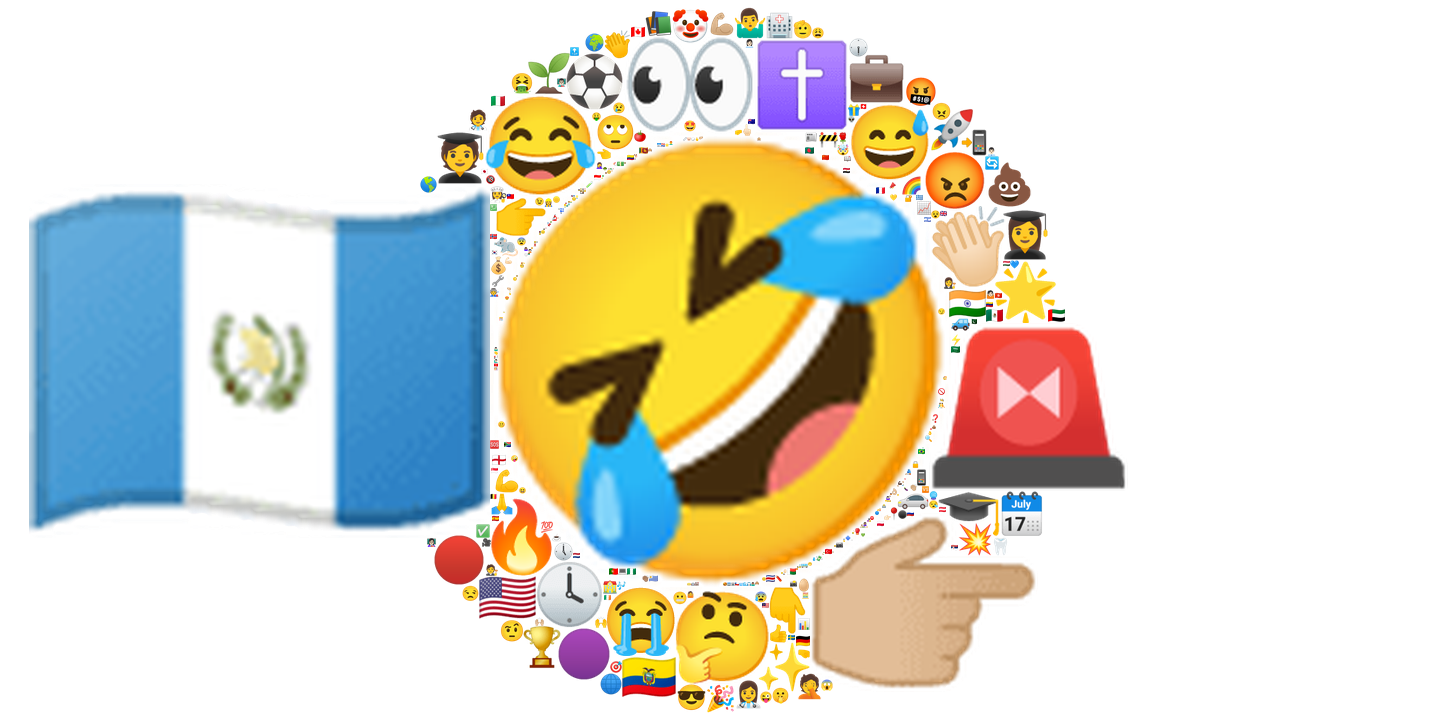

In [288]:
display(Markdown("#### Emoticons Bernardo 1"))
display(Image(filename='bernardo_emoticons1.png'))

In [240]:
lista_bernardo2 = EmojiManager.create_list_from_single_vendor(bernardo_emoticons2, GOOGLE)

# rectangle canvas 
print("Plotting rectangle cloud")
canvas_w = 72*20
canvas_h = 72*10
canvas = RectangleCanvas(canvas_w, canvas_h)
saved_emoji_cloud_name = 'bernardo_emoticons2.png'
nube_bernardo2 = plot_dense_emoji_cloud(canvas, lista_bernardo2)
nube_bernardo2.save(saved_emoji_cloud_name)

Plotting rectangle cloud


[14:18:32] plot_emoji_cloud_given_relax_ratio took 235.8601                                              ]8;id=708119;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=401838;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

           plot_dense_emoji_cloud took 237.8266                                                          ]8;id=423577;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=751735;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

#### Emoticons Bernardo 2

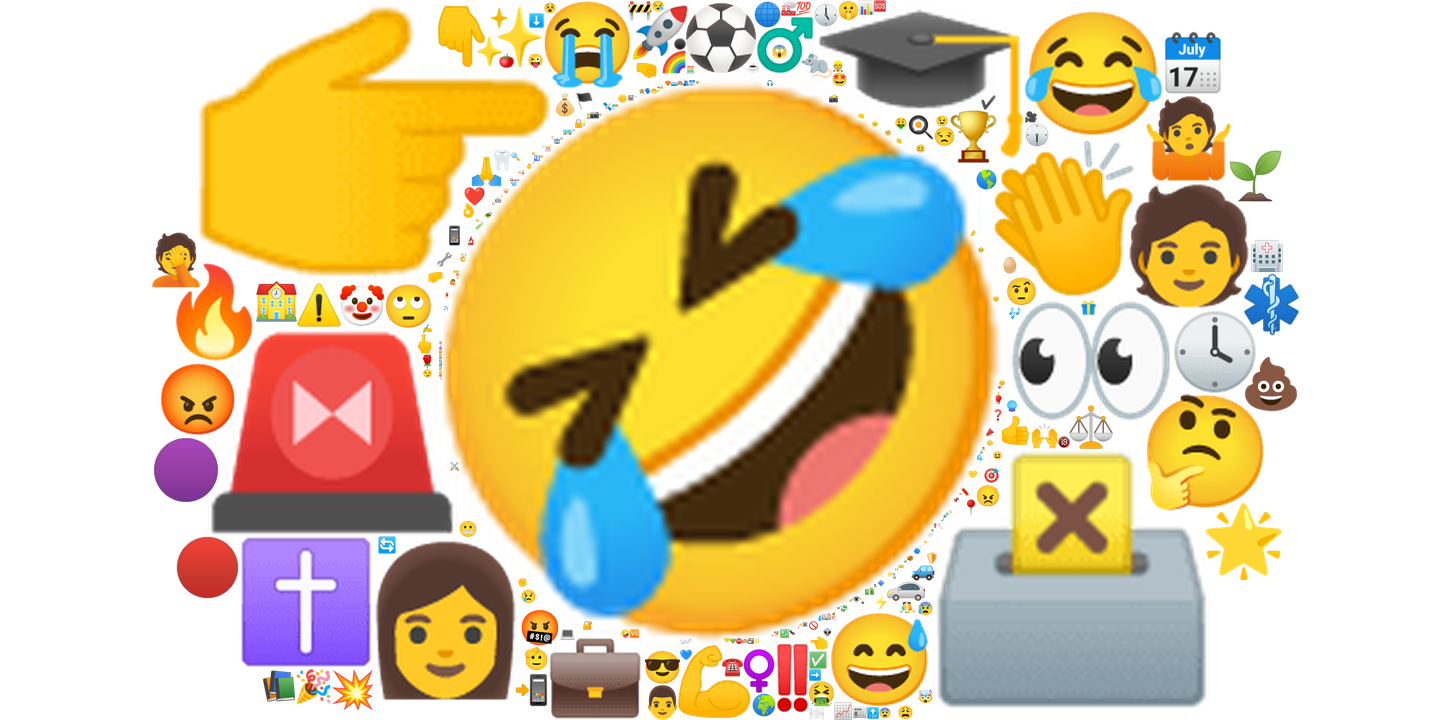

In [287]:
display(Markdown("#### Emoticons Bernardo 2"))
display(Image(filename='bernardo_emoticons2.png'))

In [275]:
df['rawContent'] = df['rawContent'].apply(clean_tweets)
text_corpus_bernardo = ' '.join(df['rawContent'])

In [278]:
df['tweetSinStopWords'] = df['rawContent'].apply(remove_stop_words)
text_corpus_bernardo_sin_stop = ' '.join(df['tweetSinStopWords'])

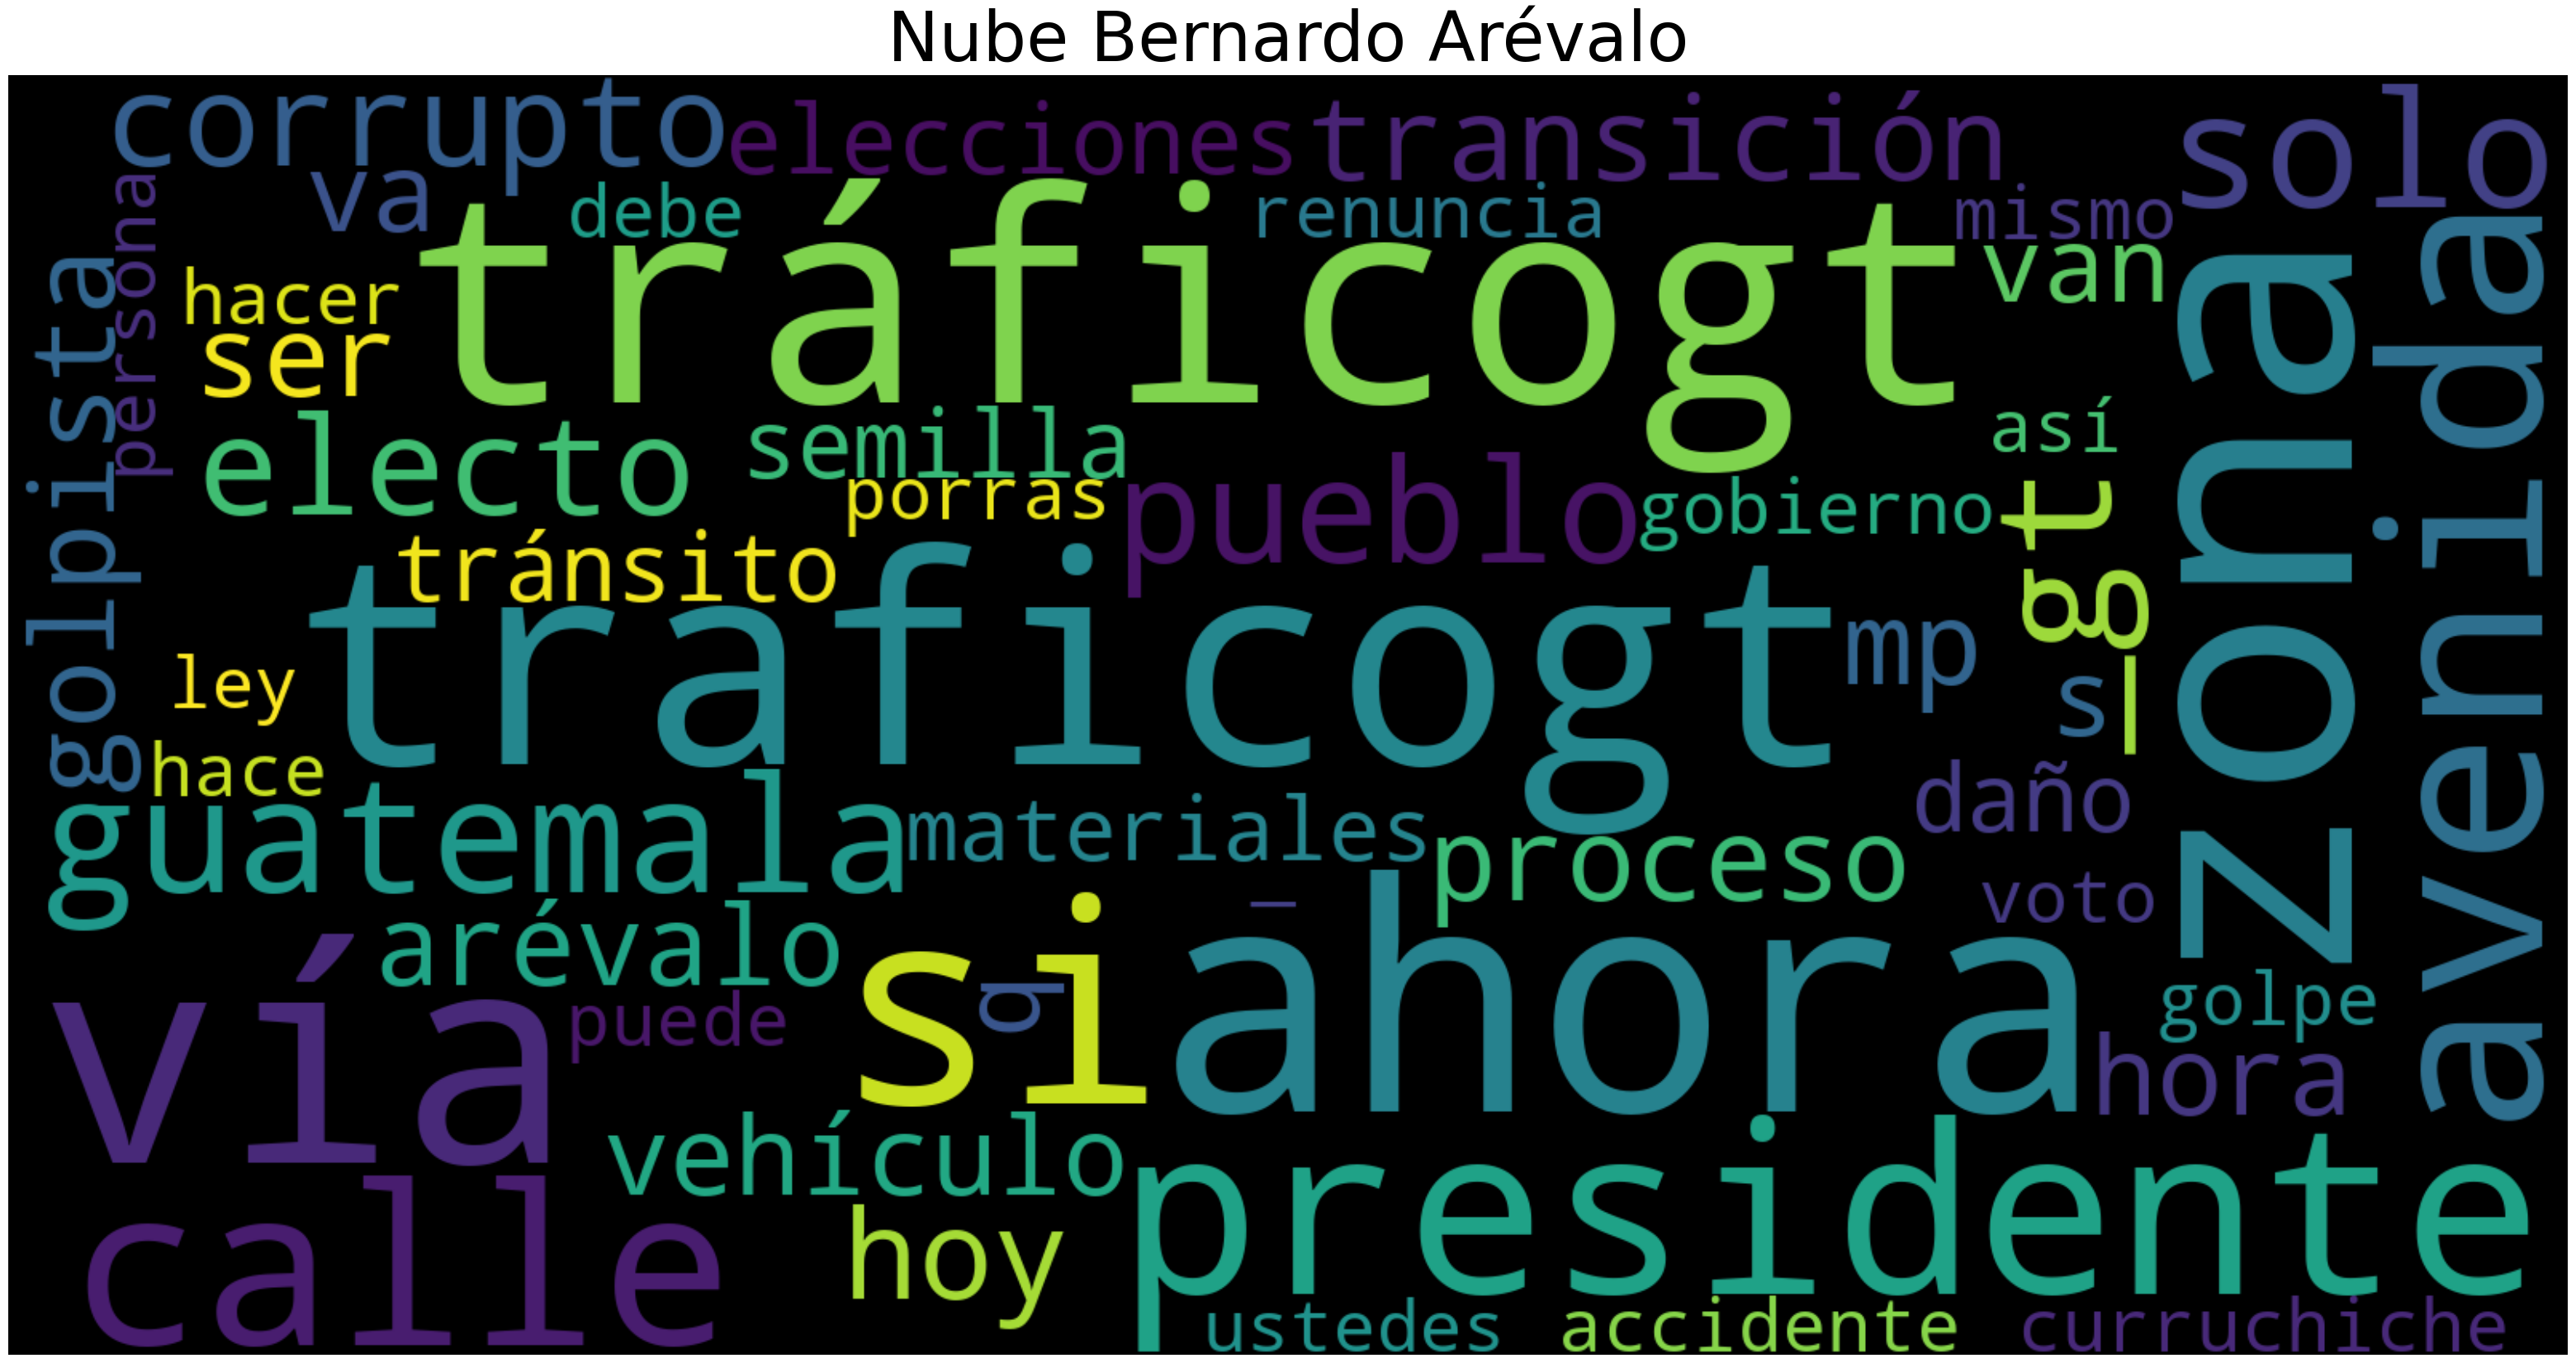

In [283]:
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=50,
                      collocations=False, background_color='black').generate(text_corpus_bernardo_sin_stop)
plt.figure(figsize=(40,30))
plt.title("Nube Bernardo Arévalo", fontsize=60, color='black')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Influencers Arevalo

In [327]:
df['username'] = df['user'].str.extract(r"'username': '([^']+)'")
df['influence'] = df['likeCount'] + df['retweetCount']
df_sorted = df.sort_values(by='influence', ascending=False)

In [338]:
influencers_bernardo = pd.DataFrame(df_sorted[['username', 'influence']]. \
                                    groupby('username')['influence'].sum().reset_index()).sort_values(by='influence', ascending=False)
influencers_bernardo.head(20)

username  influence
762       SensaHealth     284603
537          MSfromUS     117782
81     BArevalodeLeon      92126
182       DITOGAMESch      80235
1005           cohere      78113
653         OnlyInBOS      67232
1452       stats_feed      61132
1334      nayibbukele      35166
1310      mmendoza_GT      32538
262    EmisorasUnidas      31133
461    KarinHerreraVP      22916
1032       drewzecena      20991
1382     protocollabs      19402
859   WilliamFlashito      17262
263        EmmaRincon      16810
606       MillLifeMen      16609
1147       iForex_com      16556
775       SkinBaronEN      15775
1486             uicc      13310
387   Ivan_Velasquez_      11235

#### Opinion Bernardo Arevalo

In [366]:
#Aplica la función de análisis de sentimiento a cada fila del DataFrame
df['Sentimiento2'] = df['rawContent'].apply(sentimiento)
df['Sentimiento1'] = df['rawContent'].apply(get_sentiment)

# Imprime el DataFrame resultante
print(df[['rawContent','Sentimiento1','Sentimiento2']])

                                                                                                                                       rawContent  \
0     @AnonGTReloaded @msemillagt @BArevalodeLeon jajajajajajajaja que PISEN a quien se deje, ya estamos hartos de tanta ignorancia, y estos d...   
1                    @ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Dos veces lo repitió. Que está actuando al margen de la ley. Seguro está tocado.   
2     Paciente de 39 años, dolor lumbar de 1 año tras caída.\n\nHizo 45 sesiones de fisio SIN mejoría. Sugirieron cirugía.\n\nAcudió por 2da o...   
3                               @VicZacariasGT @soy_502 @BArevalodeLeon @msemillagt Mi compa la alucina, puro net pareces https://t.co/RvelUHc67W   
4     @Igor_Bitkov No le sigan el juego a este ruso invasor en enero solicitamos que @BArevalodeLeon le retire su asilo y su dpi y lo envíe de...   
...                                                                                                       

In [367]:
df['Sentimiento2'].max()
top_5_sentiments = df.nlargest(5, 'Sentimiento2')
top_5_sentiments_text = top_5_sentiments['rawContent']
top_5_sentiments_text

3152    #AHORA Diésel derramado en tramo de avenida del Ferrocarril, desde la 7.a calle hasta la 9.a calle de la zona 1. Personal de Limpia y Ve...
3153    #AHORA Diésel derramado en tramo de avenida del Ferrocarril, desde la 7.a calle hasta la 9.a calle de la zona 1. Personal de Limpia y Ve...
3515    ⚠️ #TráficoGT | SAAS realiza bloqueo vial en la 5ta. calle de la 5ta. y 6ta. avenida de la zona 1 por actividad gubernamental en Casa Pr...
3284    Caos en el centro\nAtascos \nCarros parqueados en vía procesional @amilcarmontejo \nTrifulcas con cuidadores desautorizados \n#Traficogt...
3516    #AHORA Por actividad gubernamental en Casa Presidencial y Palacio Nacional, se realiza bloqueo en la 5.a calle y 5.a avenida de la zona ...
Name: rawContent, dtype: object

C:\Users\Administrador\AppData\Local\Temp\ipykernel_26572\4101142869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['primera_vuelta'] = df.date <= '2023-06-25'


<AxesSubplot: xlabel='date', ylabel='Sentimiento2'>

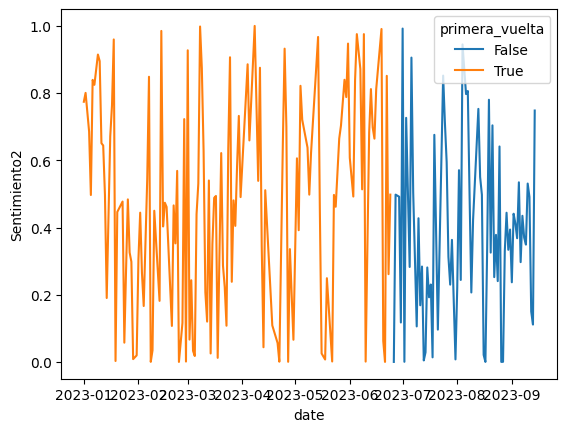

In [371]:
df = df[df['year'] == 2023]
df['primera_vuelta'] = df.date <= '2023-06-25'
sns.lineplot(x='date', y='Sentimiento2', hue='primera_vuelta', errorbar=None, data=df)

#### Estructura de la red Bernardo

In [375]:
direct_interactions_bernardo = df[df['inReplyToUser'].apply(lambda x: isinstance(x, dict) and x['username'] == 'BArevalodeLeon')]

indirect_interactions_bernardo = df[
    (df['rawContent'].str.contains('BArevalodeLeon', case=False)) & 
    ~(df['id'].isin(direct_interactions_bernardo['id']))
]

# Count the number of direct and indirect interactions
direct_count_bernardo = len(direct_interactions_bernardo)
indirect_count_bernardo = len(indirect_interactions_bernardo)

print("Interacciones directas:",direct_count_bernardo)
print("Interacciones indirectas:",indirect_count_bernardo)

Interacciones directas: 0
Interacciones indirectas: 2643


La red de Bernardo es distribuida

### Sandra Torres

In [376]:
df_sandra = pd.read_csv("sandraTorres.csv", parse_dates=['date'])

In [377]:
df_sandra['year'] = df_sandra['date'].dt.year
df_sandra['month'] = df_sandra['date'].dt.month
df_sandra['day'] = df_sandra['date'].dt.day
df_sandra['hour'] = df_sandra['date'].dt.hour
df_sandra['date'] = pd.to_datetime(df_sandra['date'].dt.date)

In [306]:
df_sandra['rawContent'].head()

0                                              @bernardosilvagt @BArevalodeLeon @DrGiammattei Mentiroso giamattei baldetti (con minúscula por..)
1    @_awskl @mjcabrerar @BArevalodeLeon @TSEGuatemala Dedonde van  sacar los 654 mil supuestos votos de la primera vuelta?\nSe va destapar e...
2    The 2023 National Race Walking Championship &amp; Youth Championship 2x10km Event sprinted into action in #Rizhao on Sept 8! 114 athlete...
3                                 @Palomin17772524 @mjcabrerar @BArevalodeLeon @TSEGuatemala Pero en tus sueños net, bañalos y te tomas el agua!
4    @ASolaresM @Mike051270 @BArevalodeLeon Otro estupido cegado por caciques, eso le impide ver su bajo nivel de conocimiento en materia eco...
Name: rawContent, dtype: object

In [307]:
df_sandra['date'].min()

'2021-07-06 11:59:00+00:00'

In [308]:
df_sandra['date'].max()

'2023-09-14 17:32:30+00:00'

In [309]:
text_corpus_sandra = ' '.join(df_sandra['rawContent'])
emoticons_text_sandra = " ".join([extract_emoticons(text) for text in text_corpus_sandra]).replace(" ", "")

In [310]:
sandra_emoji_freq = adv.word_frequency(df_sandra['rawContent'],
                                          df_sandra['viewCount'],
                                          regex=all_emoji_regex.pattern).sort_values(by='abs_freq', ascending=False)
sandra_emoji_freq.head(15)

word  abs_freq    wtd_freq  rel_value
397    🤣       546         NaN        NaN
390    😂       237         NaN        NaN
410   🇬🇹       167         NaN        NaN
396    😅       134         NaN        NaN
395    😆       120         NaN        NaN
392    🚨       113         NaN        NaN
156   🗳️        93    549305.0     5907.0
4     👉🏼        87  63957335.0   735142.0
417   ⚠️        74         NaN        NaN
288    😬        64      2890.0       45.0
6      👀        61  53456723.0   876340.0
128    🌱        55   1279151.0    23257.0
389    🤡        44         NaN        NaN
394    😃        42         NaN        NaN
234    ✝        38     75239.0     1980.0

In [311]:
text_corpus_sandra[:2000]

'@bernardosilvagt @BArevalodeLeon @DrGiammattei Mentiroso giamattei baldetti (con minúscula por..) @_awskl @mjcabrerar @BArevalodeLeon @TSEGuatemala Dedonde van  sacar los 654 mil supuestos votos de la primera vuelta?\nSe va destapar el fraude, ya no hay vuelta atras. The 2023 National Race Walking Championship &amp; Youth Championship 2x10km Event sprinted into action in #Rizhao on Sept 8! 114 athletes admired the city\'s beauty as they ran, savoring its ecological allure! #RizhaoFocus [Photo/Liu Jin] https://t.co/AFoYHZ4SLh @Palomin17772524 @mjcabrerar @BArevalodeLeon @TSEGuatemala Pero en tus sueños net, bañalos y te tomas el agua! @ASolaresM @Mike051270 @BArevalodeLeon Otro estupido cegado por caciques, eso le impide ver su bajo nivel de conocimiento en materia económica… @mjcabrerar @Palomin17772524 @BArevalodeLeon @TSEGuatemala Miles de guatemaltecos? @raulbarreragt @ElizaMorales144 ¿Cuándo, en donde y a qué horas? \n\nNecesitamos el liderazgo de @BArevalodeLeon AHORITA!!! @ElBen

In [312]:
emoticons_text_sandra[:1000]

'🤡🤷😂😂😂😂‼🎓❗💡💚🦾🎓✨👀👉🚨🚨❌🗳😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🚨✌‼❓‼❓😂😂😂😂🧡🗳👇👩💼🧑💼📊👩🎓🧑🎓❗💡💬✈🏗👇🚨🎥🌱🤡📚😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🤣🤣🤣🤣😬😬😬🤮🤮🤮🚨🚨🙏🚨👀⬇🚨🚨💩🌱🌱🌱🌱🌱🌱🌱🌱🌱😂🤣😂😂🙏🤡🤡🤡🤡🎧👇😮🤯🙏🚨🚨🏞😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🤡🤡🎥🤡✔✔✔✔😉🏛🏛🔴🔴👀💥🌿🚨🚨‼😅🤡😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🤷🤷😁🔗👉🔗👉🔗👉🔗👉🌉💥👉🔴👉💥🔴📸🔴📸🚨🔴🤡🤡🤡😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣😂😂😂😂😂😂😂😂👌👀👉🔴📷🏛🏛🔴📷😬🔴📷🔴📷🙋♀📢🔴📸🔴🚨👉🤣✈🛸🚀👎👎👎👎👎🤣🚨🗓⏰📢🤣🤣‼‼🙃🙃🐀😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🤔😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🐀😎🌱👇👇👇🤷🤷🐀🌱🐝🌱🐝🌱🙁😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬❤❤❤❤❤❤❤🌈👩🏫👨🏫💪👀👉🗳😡🤷♂😅✊🔥🤔🤔😅🤣🫢🤷♂💩💩🌱😂😂😂😂😂😂😂😂😂😂😂😂😂😂😏👇😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🗳😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🐀🐀🐀😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣😂😂😂🤩📺💪🕯🕯🕯😆😠😠🐀🐀🐀🐀🙋☝🙄🙄🙄🙄🙄🚗👉🚗😎🟢🤭🤷♀🏕🔥😉🔴🖋🤣🤣🎉🥳❤🌱😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🟢😏👀😮💨🌱👋👋👋👋👋👋👋🙄🤣🤣🤣🤣😳😳😳😳🤡🤷♂🤮🗳💃🙌👀👉😉🤔😆❌❌❌🤦✅🥚🥚🟢🍻👌👀👉🚨🤔🤡🤡🤡🤡🚨🚨⚠👉🧵🟢🤷♂🤷♂🤷♂🙏🌱❤🌹🌹🌹🌹🌹🌱😎🚨📢🧶👇🙄🙄🙄😡😡😡😡🚨🚨⚠👉🧵🟢👏🙄✌😎😂🤷♂🌊🤣🤣🤣😭😢🤮🤥🤥🤥🤥🤥🤥🤥🤥🤬🟢🟢👀🫡🧙♀😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣😃😃😆😆😆😆😆😅😅😅😅😅😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣😡😡😡🟢🟢🌲💼👇💩🙄🤣\U0001faf7✊🌱🤡🤭😂😅👎🙏🤡🟢🟢🤐🤢🤮👌⚖

In [313]:
sandra_emoticons = {}
for index, row in sandra_emoji_freq.iterrows():
    word = row['word']
    abs_freq = row['abs_freq']
    sandra_emoticons[word] = abs_freq
print(sandra_emoticons)

{'🤣': 546, '😂': 237, '🇬🇹': 167, '😅': 134, '😆': 120, '🚨': 113, '🗳️': 93, '👉🏼': 87, '⚠️': 74, '😬': 64, '👀': 61, '🌱': 55, '🤡': 44, '😃': 42, '✝': 38, '😭': 36, '🤔': 36, '🔴': 35, '👇': 32, '🗓': 31, '🙄': 30, '🎓': 29, '🕓': 28, '😡': 27, '👏🏻': 26, '💩': 25, '🔥': 25, '️': 23, '👏': 23, '🟣': 22, '🕡': 21, '🐀': 21, '⚽': 21, '🕔': 21, '🧑\u200d🎓': 20, '🤬': 20, '🇪🇨': 19, '🚗': 19, '🌟': 18, '👍': 17, '💪🏼': 17, '👉': 17, '👩\u200d🎓': 17, '❤️': 16, '🚀': 16, '🇺🇸': 16, '😎': 16, '🏆': 16, '💥': 16, '✨': 16, '💼': 16, '🟢': 14, '🌹': 14, '🙏🏼': 14, '👩\u200d⚕️': 14, '🤮': 12, '🏥': 12, '📚': 12, '💪': 12, '🇮🇳': 11, '🤷': 11, '🚧': 11, '😳': 11, '🧑\u200d⚕️': 11, '🤨': 11, '🙏': 11, '📹': 10, '👎': 10, '📸': 10, '📷': 10, '🤦': 10, '🤷🏻\u200d♂️': 10, '🎉': 10, '👋': 9, '🤷\u200d♂️': 9, '📲': 9, '✅': 8, '🦷': 8, '😉': 8, '🌈': 8, '💰': 8, '🥚': 8, '😠': 8, '🖕': 8, '📊': 8, '✔️': 8, '👈': 8, '✝️': 8, '🤥': 8, '🎥': 7, '🇩🇪': 7, '❌': 7, '🙌🏼': 7, '😱': 7, '🤩': 7, '🏫': 7, '🧵': 7, '⬇️': 6, '🤯': 6, '🆚': 6, '🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000

In [314]:
sandra_emoticons2 = dict(Counter(emoticons_text_sandra))
print(sandra_emoticons2)

{'🤡': 44, '🤷': 42, '😂': 237, '‼': 23, '🎓': 66, '❗': 3, '💡': 4, '💚': 4, '🦾': 1, '✨': 16, '👀': 61, '👉': 112, '🚨': 113, '❌': 7, '🗳': 96, '😃': 42, '😆': 120, '😅': 134, '🤣': 546, '✌': 3, '❓': 5, '🧡': 3, '👇': 37, '👩': 44, '💼': 26, '🧑': 40, '📊': 8, '💬': 1, '✈': 4, '🏗': 1, '🎥': 7, '🌱': 55, '📚': 12, '😬': 64, '🤮': 12, '🙏': 29, '⬇': 6, '💩': 25, '🎧': 3, '😮': 2, '🤯': 6, '🏞': 1, '✔': 8, '😉': 8, '🏛': 6, '🔴': 35, '💥': 16, '🌿': 6, '😁': 1, '🔗': 4, '🌉': 2, '📸': 10, '👌': 6, '📷': 10, '🙋': 3, '♀': 16, '📢': 6, '🛸': 1, '🚀': 16, '👎': 10, '🗓': 34, '⏰': 2, '🙃': 3, '🐀': 21, '🤔': 36, '😎': 16, '🐝': 3, '🙁': 2, '❤': 16, '🌈': 9, '🏫': 15, '👨': 10, '💪': 35, '😡': 27, '♂': 29, '✊': 5, '🔥': 25, '🫢': 1, '😏': 5, '🤩': 7, '📺': 3, '🕯': 3, '😠': 8, '☝': 1, '🙄': 30, '🚗': 19, '🟢': 14, '🤭': 6, '🏕': 1, '🖋': 1, '🎉': 10, '🥳': 5, '💨': 3, '👋': 10, '😳': 11, '💃': 3, '🙌': 10, '🤦': 19, '✅': 8, '🥚': 8, '🍻': 2, '⚠': 74, '🧵': 7, '🌹': 14, '🧶': 1, '👏': 55, '🌊': 6, '😭': 36, '😢': 5, '🤥': 8, '🤬': 20, '🫡': 6, '🧙': 1, '🌲': 1, '\U0001faf7': 1, '🤐': 1, '

#### Nube de Emoji Sandra

In [315]:
lista_sandra1 = EmojiManager.create_list_from_single_vendor(sandra_emoticons, GOOGLE)

# rectangle canvas 
print("Plotting rectangle cloud")
canvas_w = 72*20
canvas_h = 72*10
canvas = RectangleCanvas(canvas_w, canvas_h)
saved_emoji_cloud_name = 'sandra_emoticons1.png'
nube_sandra1 = plot_dense_emoji_cloud(canvas, lista_sandra1)
nube_sandra1.save(saved_emoji_cloud_name)

Plotting rectangle cloud


[22:33:09] plot_emoji_cloud_given_relax_ratio took 40.5703                                               ]8;id=623747;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=485626;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

[22:38:05] plot_emoji_cloud_given_relax_ratio took 295.9663                                              ]8;id=919409;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=121756;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

           plot_dense_emoji_cloud took 338.6916                                                          ]8;id=482763;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=272904;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

#### Emoticons Sandra 1

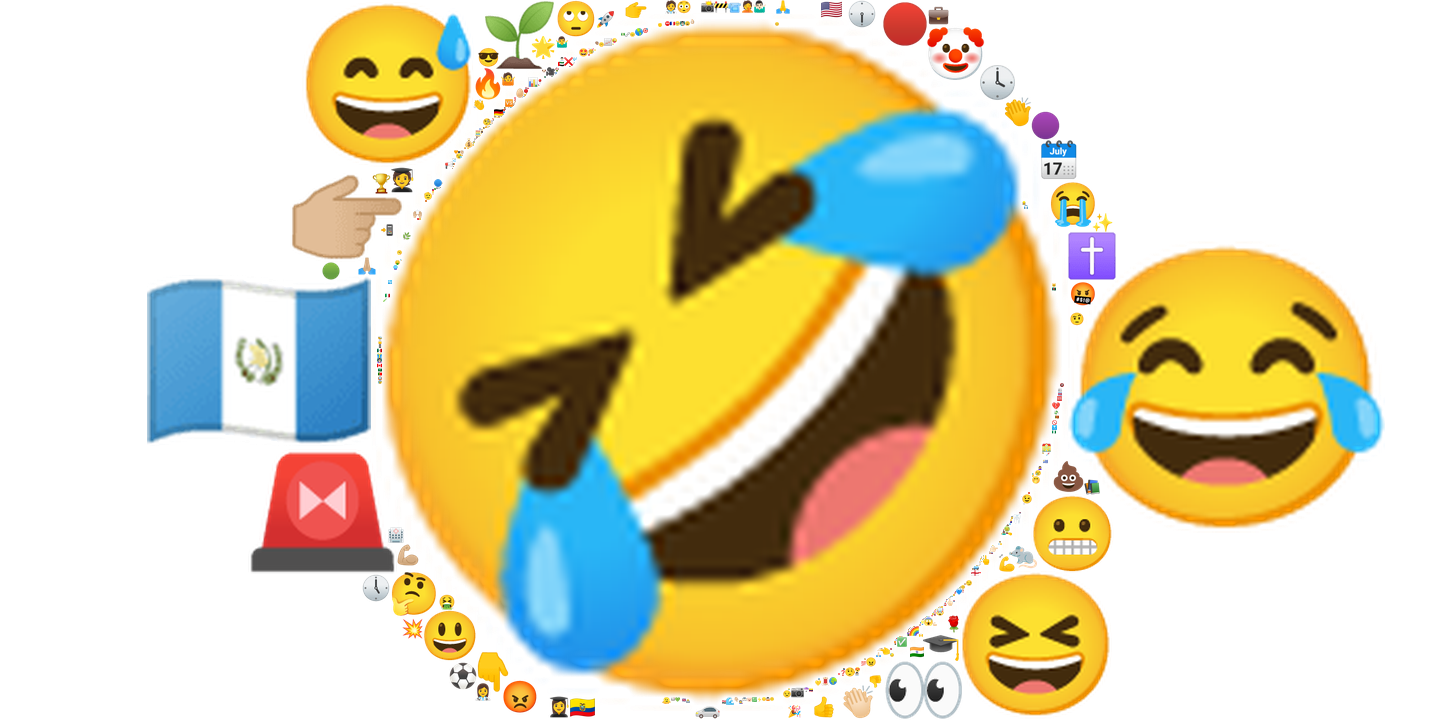

In [316]:
display(Markdown("#### Emoticons Sandra 1"))
display(Image(filename='sandra_emoticons1.png'))

In [317]:
lista_sandra2 = EmojiManager.create_list_from_single_vendor(sandra_emoticons2, GOOGLE)

# rectangle canvas 
print("Plotting rectangle cloud")
canvas_w = 72*20
canvas_h = 72*10
canvas = RectangleCanvas(canvas_w, canvas_h)
saved_emoji_cloud_name = 'sandra_emoticons2.png'
nube_sandra2 = plot_dense_emoji_cloud(canvas, lista_sandra2)
nube_sandra2.save(saved_emoji_cloud_name)

Plotting rectangle cloud


[22:38:50] plot_emoji_cloud_given_relax_ratio took 42.3089                                               ]8;id=221318;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=301831;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

[22:42:59] plot_emoji_cloud_given_relax_ratio took 249.3403                                              ]8;id=241338;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=462878;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

           plot_dense_emoji_cloud took 293.8605                                                          ]8;id=902007;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=529454;file://C:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\EmojiCloud\util.py#16\16]8;;\

#### Emoticons Sandra 2

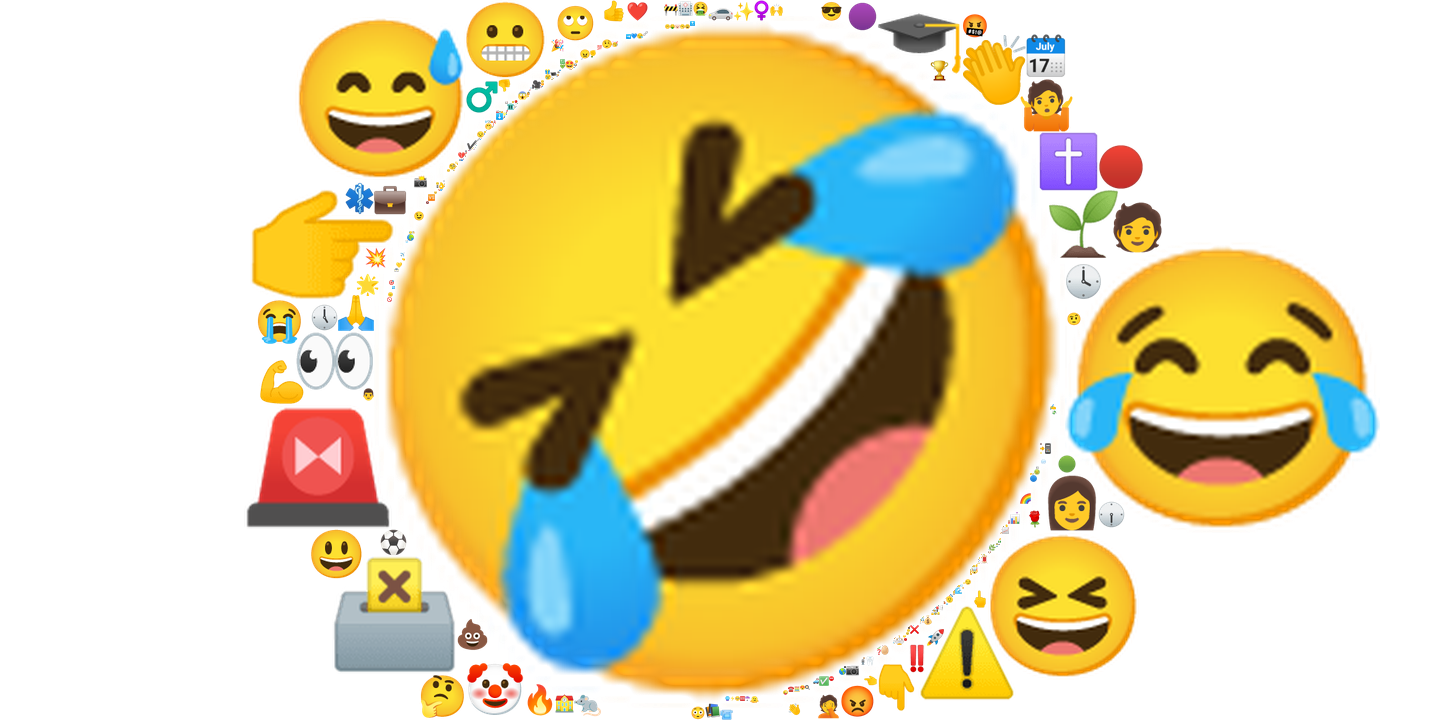

In [318]:
display(Markdown("#### Emoticons Sandra 2"))
display(Image(filename='sandra_emoticons2.png'))

In [319]:
df_sandra['rawContent'] = df_sandra['rawContent'].apply(clean_tweets)
text_corpus_bernardo = ' '.join(df_sandra['rawContent'])

C:\Users\Administrador\AppData\Local\Temp\ipykernel_26572\3993016833.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  del_amp = BeautifulSoup(tweet, 'lxml')
C:\Users\Administrador\AppData\Local\Temp\ipykernel_26572\3993016833.py:11: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  del_amp = BeautifulSoup(tweet, 'lxml')


In [320]:
df_sandra['tweetSinStopWords'] = df_sandra['rawContent'].apply(remove_stop_words)
text_corpus_sandra_sin_stop = ' '.join(df_sandra['tweetSinStopWords'])

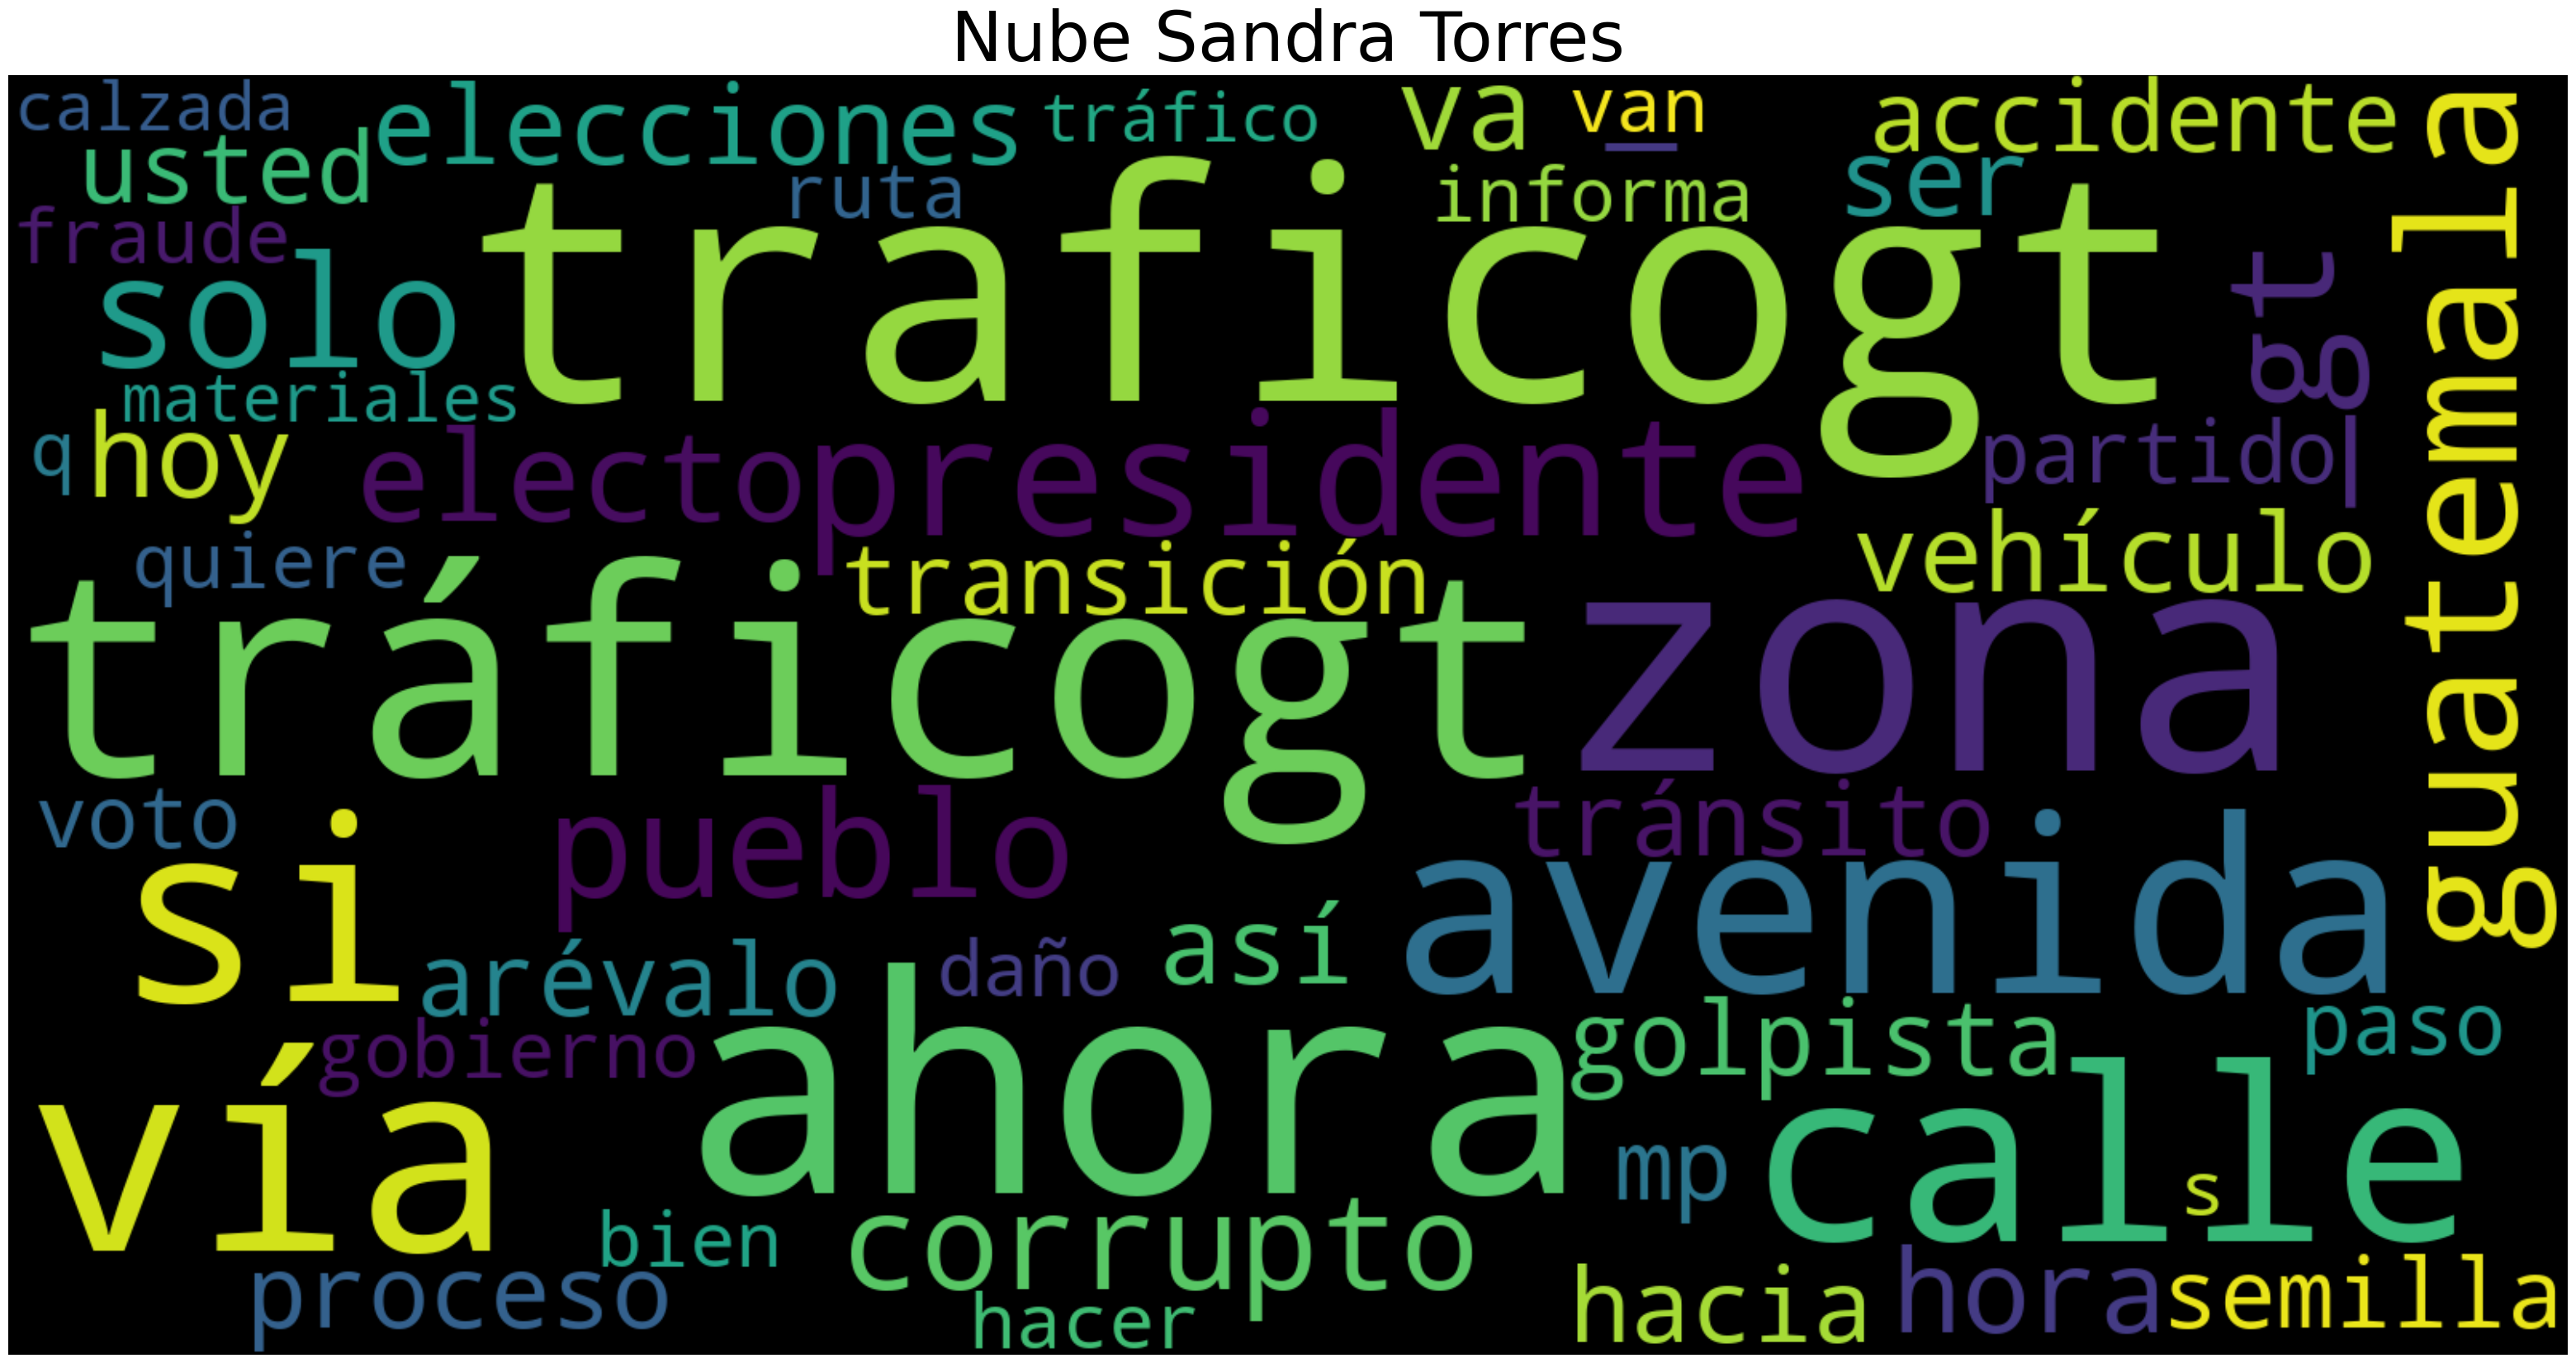

In [321]:
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=50,
                      collocations=False, background_color='black').generate(text_corpus_sandra_sin_stop)
plt.figure(figsize=(40,30))
plt.title("Nube Sandra Torres", fontsize=60, color='black')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Influencers Sandra Torres

In [339]:
df_sandra['username'] = df_sandra['user'].str.extract(r"'username': '([^']+)'")
df_sandra['influence'] = df_sandra['likeCount'] + df_sandra['retweetCount']
df_sorted_sandra = df_sandra.sort_values(by='influence', ascending=False)

In [340]:
influencers_sandra = pd.DataFrame(df_sorted_sandra[['username', 'influence']]. \
                                    groupby('username')['influence'].sum().reset_index()).sort_values(by='influence', ascending=False)
influencers_sandra.head(20)

username  influence
1275      SensaHealth     142359
1359         UHN_Plus      95693
905          MSfromUS      95125
143    BArevalodeLeon      71719
316       DITOGAMESch      66092
2464       stats_feed      47038
1681           cohere      41718
444    EmisorasUnidas      34124
1090        OnlyInBOS      33617
2237      mmendoza_GT      32571
1040  Myeloma_Society      32282
2038  juanfloreschaar      27644
1735       drewzecena      26541
2352     protocollabs      19602
2271      nayibbukele      17585
1426  WilliamFlashito      17262
2080  kindness4succes      16495
1012      MillLifeMen      16448
783    KarinHerreraVP      16322
1296      SkinBaronEN      13253

#### Opinion Sandra Torres

In [378]:
#Aplica la función de análisis de sentimiento a cada fila del DataFrame
df_sandra['Sentimiento2'] = df_sandra['rawContent'].apply(sentimiento)
df_sandra['Sentimiento1'] = df_sandra['rawContent'].apply(get_sentiment)

# Imprime el DataFrame resultante
print(df_sandra[['rawContent','Sentimiento1','Sentimiento2']])

                                                                                                                                       rawContent  \
0                                               @bernardosilvagt @BArevalodeLeon @DrGiammattei Mentiroso giamattei baldetti (con minúscula por..)   
1     @_awskl @mjcabrerar @BArevalodeLeon @TSEGuatemala Dedonde van  sacar los 654 mil supuestos votos de la primera vuelta?\nSe va destapar e...   
2     The 2023 National Race Walking Championship &amp; Youth Championship 2x10km Event sprinted into action in #Rizhao on Sept 8! 114 athlete...   
3                                  @Palomin17772524 @mjcabrerar @BArevalodeLeon @TSEGuatemala Pero en tus sueños net, bañalos y te tomas el agua!   
4     @ASolaresM @Mike051270 @BArevalodeLeon Otro estupido cegado por caciques, eso le impide ver su bajo nivel de conocimiento en materia eco...   
...                                                                                                       

In [379]:
df_sandra['Sentimiento2'].max()
top_5_sentiments_sandra = df_sandra.nlargest(5, 'Sentimiento2')
top_5_sentiments_text_sandra = top_5_sentiments_sandra['rawContent']
top_5_sentiments_text_sandra

5311    Precaución #tráficoGT árbol 🌳 caído en la 6 calle y Avenida zona 10, se encuentra cerrada la 6 calle desde la 2 Avenida zona 10. Persona...
105     #AHORA Momento en que fiscales del Ministerio Público abren algunas cajas durante allanamientos realizados en el Centro de Operaciones d...
204     #AHORA Momento en que fiscales del Ministerio Público abren algunas cajas durante allanamientos realizados en el Centro de Operaciones d...
268     #AHORA Momento en que fiscales del Ministerio Público abren algunas cajas durante allanamientos realizados en el Centro de Operaciones d...
116     #AHORA El @MPguatemala  solicita a las autoridades de la @PNCdeGuatemala colocar un cordón que permita el desarrollo de diligencias sin ...
Name: rawContent, dtype: object

<AxesSubplot: xlabel='date', ylabel='Sentimiento2'>

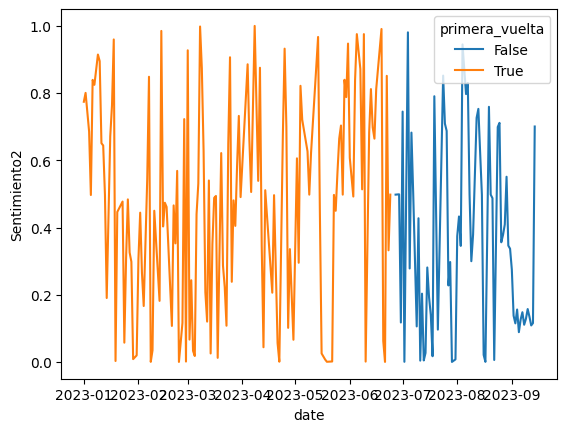

In [380]:
df_sandra = df_sandra[df_sandra['year'] == 2023]
df_sandra['primera_vuelta'] = df_sandra.date <= '2023-06-25'
sns.lineplot(x='date', y='Sentimiento2', hue='primera_vuelta', errorbar=None, data=df_sandra)

#### Estructura de la red Sandra Torres

In [381]:
direct_interactions_sandra = df_sandra[df_sandra['inReplyToUser'].apply(lambda x: isinstance(x, dict) and x['username'] == 'SandraTorresGUA')]

indirect_interactions_sandra = df_sandra[
    (df_sandra['rawContent'].str.contains('SandraTorresGUA', case=False)) & 
    ~(df_sandra['id'].isin(direct_interactions_sandra['id']))
]

# Count the number of direct and indirect interactions
direct_count_sandra = len(direct_interactions_sandra)
indirect_count_sandra = len(indirect_interactions_sandra)

print("Interacciones directas:",direct_count_sandra)
print("Interacciones indirectas:",indirect_count_sandra)

Interacciones directas: 0
Interacciones indirectas: 852


Tampoco hay interacciones directas por lo que también es distribuida